# <center>Digital Image Processing - Problem Set 4</center>

### Student Names:

### Instructions

This Problem Set covers the topics of Morphological operations, Region filling, Canny edge detection, Hough Transform, Thresholding, Watershed segmentation, $k$-means segmentation.<br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

## Problem 1

Write a function that performs the following sequence of morphological operations on a binary image and displays the intermediate and final results.

1. Create a square-shaped structuring element of size 3 by 3.
2. Erode the input image.
3. Dilate the result of b.
4. Dilate the result of c.
5. Erode the result of d.

Write a second function that performs the following operations and displays the intermediate and final results.

1. Create a square-shaped structuring element of size 3 by 3.
2. Perform opening of the input image.
3. Compute the closing of the result from b.

Apply both functions to the image <tt>noisy_fingerprint.jpg</tt>. Discuss the differences and similarities between the final results of using both functions.


In [1]:
import cv2
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np 

True


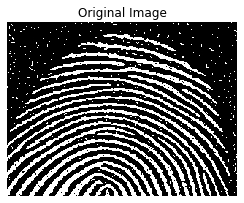

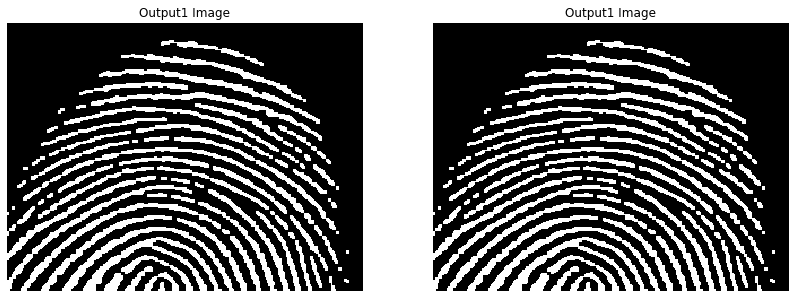

In [2]:
def process1(image):
    square_shape = np.ones((3,3), np.uint8)
    image = cv2.erode(image, square_shape, iterations = 1)
    image = cv2.dilate(image, square_shape, iterations = 2)
    image = cv2.erode(image, square_shape, iterations = 1)
    return image 
    
def process2(image):
    square_shape = np.ones((3,3), np.uint8)
    image = cv2.morphologyEx(image, cv2.MORPH_OPEN, square_shape)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, square_shape)
    return image 

def main1():
    filename = 'files/noisy_fingerprint.jpg'
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    # display original image
    plt.figure(figsize = (14,14))
    plt.subplot(1,3,1)
    plt.imshow(image, cmap = 'gray')
    plt.axis('off')
    plt.title('Original Image')   
    # calculate the output1 
    output1 = process1(image)
    # display output1 
    plt.figure(figsize = (14,14))
    plt.subplot(1,2,1)
    plt.imshow(output1, cmap = 'gray')
    plt.axis('off')
    plt.title('Output1 Image') 
    # computer the output2 
    output2 = process2(image)
    # display output1 
    plt.subplot(1,2,2)
    plt.imshow(output2, cmap = 'gray')
    plt.axis('off')
    plt.title('Output1 Image')
    # are outputs equals? 
    print(np.array_equal(output1, output2))
    # display all  
    plt.show()
    


main1()

### Result

The algorithm target is deleting small white dots. 

The first function uses simples morphological operations like erosion and dilation. **Erosion** is the first step, it reduces the width to fingerprint lines and delete the small dots, then use **Dilation** twice in order to increase the width of the lines. Finally use a new erosion. In this way erosion delete the small points and dilation restore original fingerprint width. Erosion and Dilation needs a kernel to be applied, use the same kernel allows output image is not distorted.   

The second function also use morphological transformation. First,  an **opening** function is applied. This function consist in an erosion of an image followed by a dilation. Then, **closing** function applies a dilation followed by an erosion.

Both functions consist in erosion-dilation-dilation-erosion and use the same kernel. Therefore, the output of boths functions are equal. 


## Problem 2

Write a function that implements the region filling function discussed in class.
In this function you will need to use an interactive plot, so we need to disable <tt>inline</tt> plotting. This can be done with the following code:

In [3]:
# %matplotlib qt
# wx, gtk, osx or tk


The algorithm should proceed as follows:

1. Open and display the input binary image.
2. Using the <tt>plt.ginput</tt> function, specify a pixel within the region that you want to fill. Record the $(x, y)$ coordinate of the selected pixel.
3. Generate $X_0$, a binary image whose size is equal to the size of the input image. The pixel at the coordinate selected in the previous step should be set to 1, all other pixels should be set to zero.
4. Compute $X_k$ according to the following equation. Repeat until convergence, i.e. $X_k = X_{k-1}$
\begin{equation}
X_k=(X_{k-1} ⊕ B) ∩ A^c
\end{equation}

5. Compute the union between the final $X_k$ and the original image to fill the region.

Apply your function to the image <tt>spheres.jpg</tt> to fill in all the black circles.


In [4]:
#sudo apt-get install python3-tk
import tkinter as tk 

#sudo apt-get install python3-pil python3-pil.imagetk
from PIL import Image, ImageTk 

In [5]:
%matplotlib qt

def fill_image(pos):
    # generate a zeros matrix with the cursor click point white
    Xk = np.zeros(img.shape, dtype=np.uint8)
    Xk[pos] = 255
    # generate an crooss matrix 
    B = 255*cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)).astype(np.uint8)
    # get de image complement
    complement = 255 - img 
    
    while(True):
        X2 = Xk.copy()
        Xk = cv2.dilate(Xk, B, iterations = 1)
        Xk = np.bitwise_and(Xk,complement)
        if(np.array_equal(Xk, X2)):
            break
    
    return np.bitwise_or(Xk,img)    

def click_event(event):
    pos = (event.y, event.x)
    global img 
    img = fill_image(pos)
    image = Image.fromarray(img)
    image = ImageTk.PhotoImage(image) 
    panel.configure(image=image)
    panel.image = image
    #print("sucess")
    
def main2():
    
    global img
    global panel
    
    #load image 
    path = 'files/spheres.jpg'
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((2,2), np.uint8))
    
    root = tk.Tk()
    
    image = Image.fromarray(img)
    image = ImageTk.PhotoImage(image)
    
    panel = tk.Label(root, image = image)
    panel.image = image
    panel.bind('<Button-1>', click_event)
    panel.pack()
    
    root.mainloop()

# if __name__ == "__main__":
main2()

The second algorithm uses an interactive **tkinter GUI** to fill black circles. The function generate a windows that contain the spheres images. The **onclick event** was assigned to image. When an user clicked on black region activate the **clicked_event** function, this function replace the image to the windows for the output of the **filled_function**. This function apply delete the black region.

First, the **filled_function** obtain the position of the click event. Then, generate a black matrix with a white dot when click was pressed. **Dilation** increases dot size until dot size and size black circles are equal. Finally, black circle is deleted using logic operations: **np.bitwise_and** return region which should be deleted and **np.bitwise_or** join the region deleted with the input image. In other words, the  **filled_function** applies the following equation many times:

$ X_k = (X_{k-1} \oplus B) \cap A^C $

where the symbol $\oplus$ represent a dilation, $A^C$ is the input image complement. The process stop when equation converges  ($X_k = X_{k-1}$).


## Problem 3

Connected component labeling (also known as connected component analysis, blob extraction, region labeling, blob discovery, or region extraction) is an algorithm that uniquely labels connected components. The definition of connected components depends on the type of pixel adjacency used (pixel adjacency is defined and described in the book). In this problem, we will look at how the result of a connected component labeling algorithm changes when using 4-adjacency or 8-adjacency.

Write a function, <tt>labelConnectedComponents</tt>, which identifies and labels each connected component in a binary image. The function should take as an input the kind of adjacency to be used (either 4-adjacency or 8-adjacency). The function should also display the resulting connected components as shown below (particular coloring may differ). Apply this function to the images crosses.gif and chessboard.gif. Compare the connected components obtained when using 4-adjacency against those obtained when using 8-adjacency. Please comment your results: are these what you expected?

<b>Hint</b>: Use the functions <tt>cv2.findContours</tt> and <tt>cv2.drawContours</tt>. The following Wikipedia article is also a useful reference:
http://en.wikipedia.org/wiki/Connected_Component_Labeling

<img src="files/crosses.png"/>
<img src="files/connected.jpg"/>

crosses.png


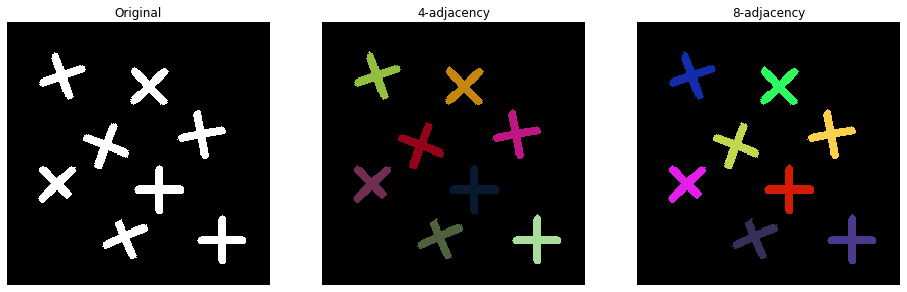

spheres.jpg


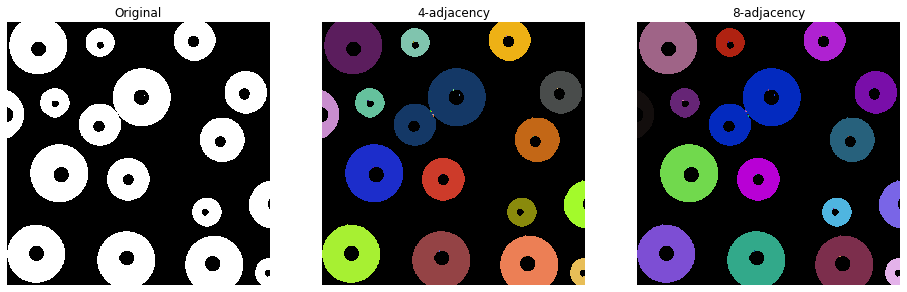

In [6]:
%matplotlib inline
def labelConnectedComponents(image, adj=4):
    _, image2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    _, contours, hierarchy = cv2.findContours(image2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # mask and output
    h, w = image2.shape[:2]
    out = cv2.cvtColor(image2, cv2.COLOR_GRAY2BGR)
    mask2 = np.zeros((h + 2, w + 2), np.uint8)
    
    for ind, item in enumerate(contours):
        # select random color 
        r = np.random.randint(0,255)
        g = np.random.randint(0,255)
        b = np.random.randint(0,255)
        # point
        cv2.drawContours(out, item, 0, (b, g, r),2) 
        for k in range(item.shape[0]):
            i, j = item[k][0][0], item[k][0][1]
            cv2.floodFill(out, mask2, (i, j), (b,g,r), flags = adj)    
    return out

def main3():
    img_names = ["crosses.png", "spheres.jpg"]
    for name in img_names:
        print (name)
    
        img = cv2.imread("files/" + name, cv2.IMREAD_GRAYSCALE)
        plt.figure(figsize=(16,10));
        plt.subplot(1,3,1);
        plt.imshow(img, cmap = 'gray');
        plt.title('Original');
        plt.axis(False);
        
        img2 = labelConnectedComponents(img, 4)
        plt.subplot(1,3,2);
        plt.imshow(img2);
        plt.title('4-adjacency');
        plt.axis(False);
        
        img3 = labelConnectedComponents(img, 8)
        plt.subplot(1,3,3);
        plt.imshow(img3)
        plt.title('8-adjacency');
        plt.axis(False);
        
        plt.show()
        
main3()

## Problem 4

The blog ‘Steve on Image Processing’ contains useful information about image processing with MATLAB. One of Steve’s posts talks about using morphological operations to identify characters containing a tall vertical segment. The post is at:
http://blogs.mathworks.com/steve/2008/07/14/opening-by-reconstruction/

Replicate the results with Python and OpenCV. You may find that the functions <tt>cv2.findContours</tt> and <tt>cv2.floodFill</tt> are useful for this.

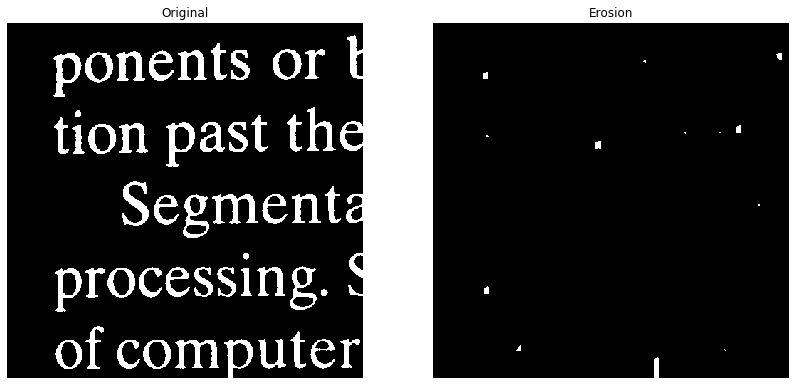

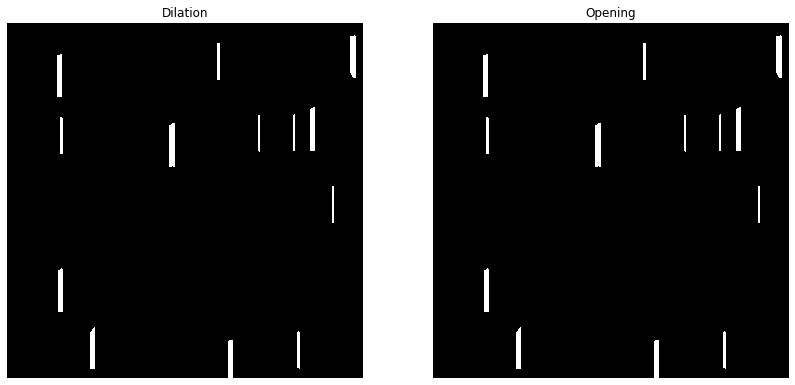

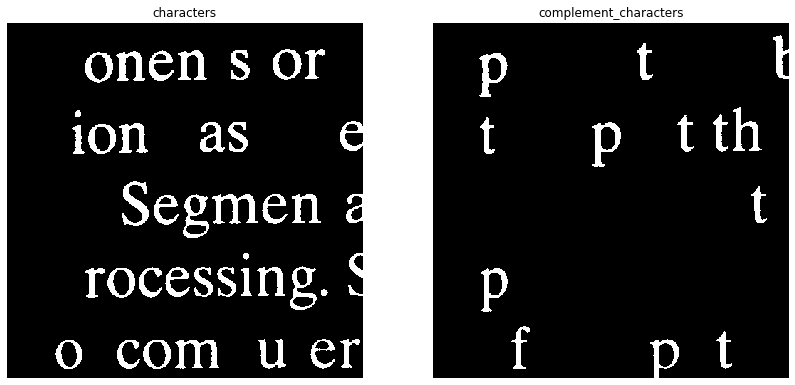

In [7]:
%matplotlib inline

def imreconstructed(marker, mask, adj=4):
    image = mask.copy()
    h, w = image.shape[:2]
    new_mask = np.zeros((h + 2, w + 2), np.uint8)
    
    _, contours, hierarchy = cv2.findContours(marker, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    
    for ind, item in enumerate(contours):
        cv2.drawContours(image, item, 0, 255, 2) 
        for k in range(item.shape[0]):
            i, j = item[k][0][0], item[k][0][1]
            cv2.floodFill(image, new_mask, (i, j), 0)    
    """
    for i in range(h):
        for j in range(w):
            if marker[i][j] == 255:
                cv2.floodFill(image, new_mask, (j,i), 0)
    """
    return image

def main4():
    # load original picture
    bw = cv2.imread('files/steve_blog.png', cv2.IMREAD_GRAYSCALE)

    # create kernel 
    se = np.ones((51,1),np.uint8)
    # erode first
    bw2 = cv2.erode(bw,se,iterations = 1)

    # then dilate
    bw3d = cv2.dilate(bw2,se,iterations = 1)
    
    # erode and dilate
    bw3o = cv2.morphologyEx(bw, cv2.MORPH_OPEN, se)

    ##recons = cv2.morphologyEx(bw2, cv2.MORPH_CLOSE, bw)

    # This is important, 
    # marker = bw2
    # marker = cv2.erode(bw,se,iterations = 1)
    # also
    # mask = bw
    # so, is not neccesary create a new variables
    
    characters = imreconstructed(bw3o, bw)
    
    #complement_characters = bw - characters
    complement_characters = np.subtract(bw, characters)

    plt.figure(figsize = (14,14))
    plt.subplot(1,2,1)
    plt.imshow(bw, cmap = 'gray')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(bw2, cmap = 'gray')
    plt.title('Erosion')
    plt.axis('off')
    
    plt.figure(figsize = (14,14))
    plt.subplot(1,2,1)
    plt.imshow(bw3d, cmap = 'gray')
    plt.title('Dilation')
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(bw3o, cmap = 'gray')
    plt.title('Opening')
    plt.axis('off')
    
    plt.figure(figsize = (14,14))
    plt.subplot(1,2,1)
    plt.imshow(characters, cmap = 'gray')
    plt.title('characters')
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(complement_characters, cmap = 'gray')
    plt.title('complement_characters')
    plt.axis('off')
    
    plt.show()


main4()

## Problem 5 

Write a function that detects edges in an image using Canny’s method, which is available in the function <tt>cv2.Canny</tt>.
Your function should first smooth the image using a Guassian filter, which you can do with <tt>cv2.GaussianBlur</tt>.
Try out Canny's method with different sizes the smoothing kernel and analyze the results.
Also, try changing the thresholds in the edge detection process. What are the effects of each parameter?

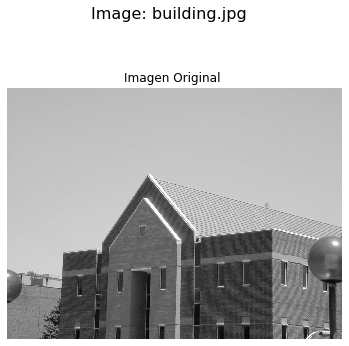

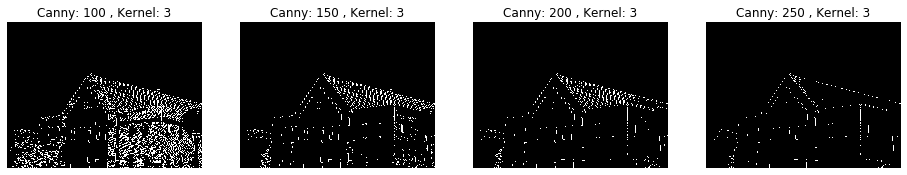

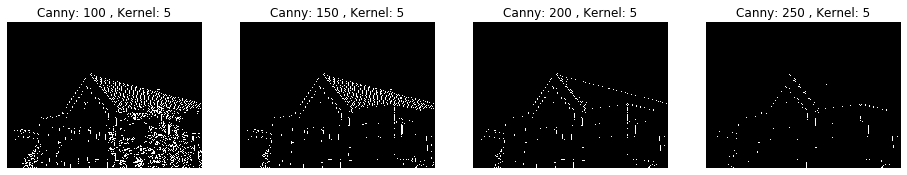

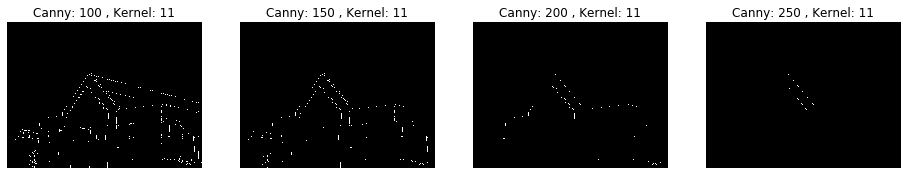

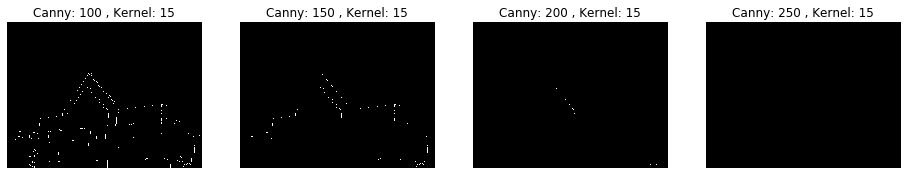

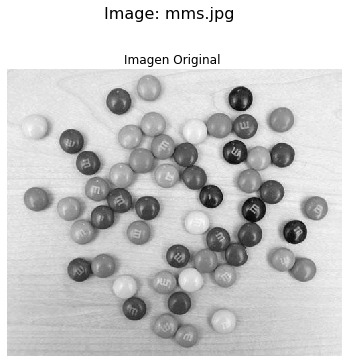

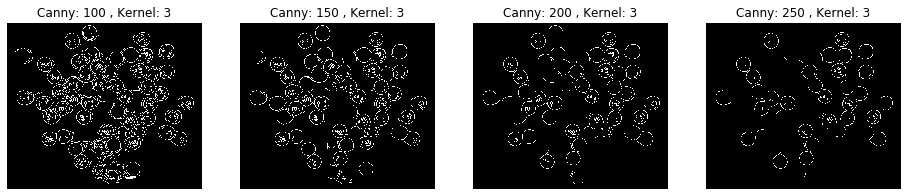

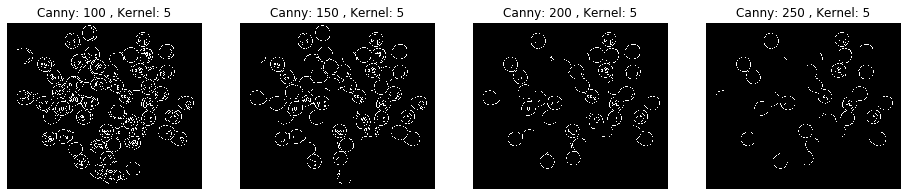

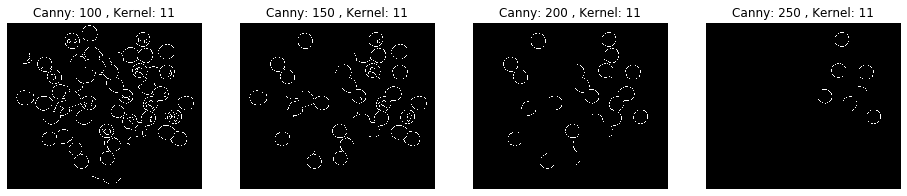

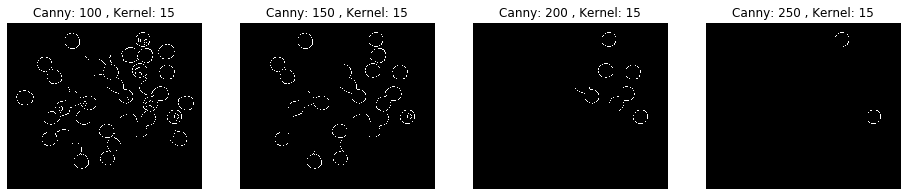

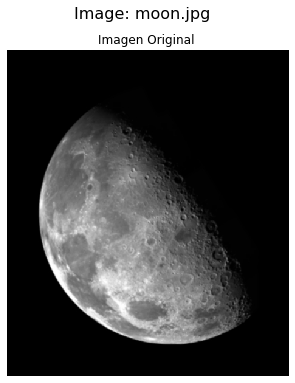

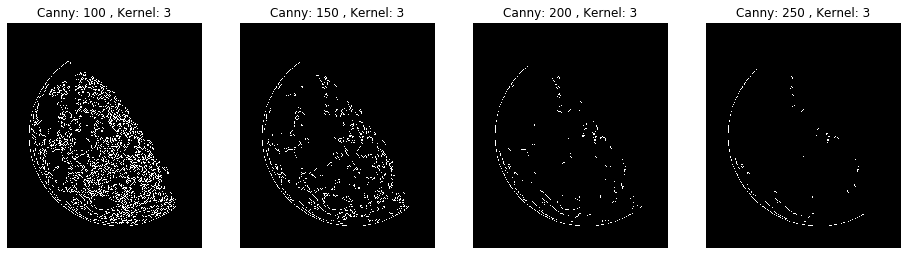

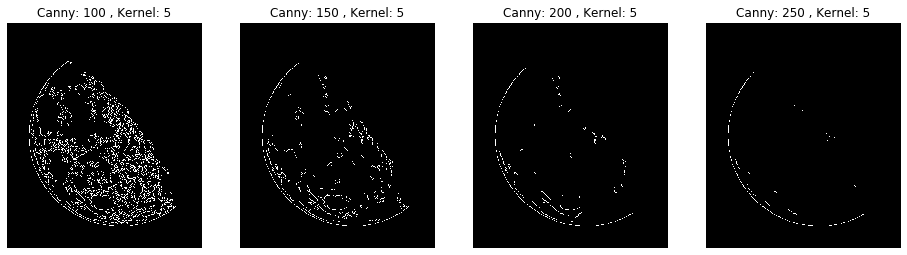

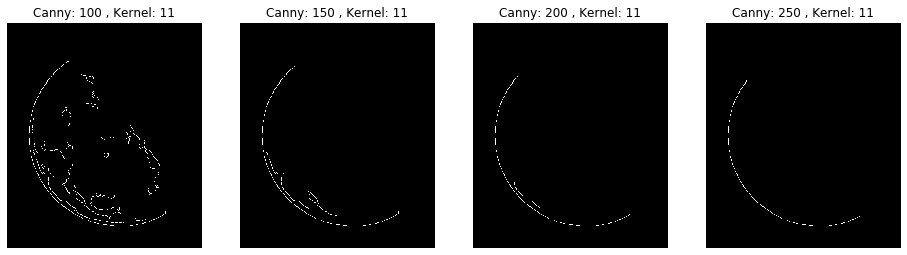

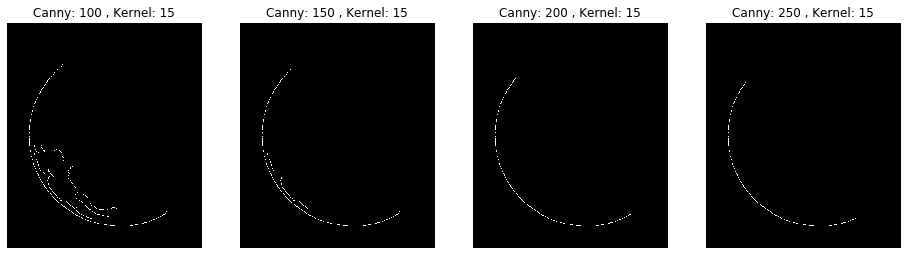

In [8]:
%matplotlib inline

def EdgeDetector(image):
    for kernel in [3, 5, 11, 15]:
        blur_img = cv2.GaussianBlur(image,(kernel,kernel),0)
        
        plt.figure(figsize=(16, 18))
        listcan = [100, 150, 200, 250]
        for  i, can in enumerate(listcan):
            edge = cv2.Canny(blur_img,can-80,can)
            plt.subplot(1, len(listcan), i + 1)
            plt.title("Canny: " + str(can) +" , Kernel: "+str(kernel)) 
            plt.imshow(edge, cmap = 'gray')
            plt.axis(False)

def main5():            
    images = ['building.jpg','mms.jpg','moon.jpg']

    for name in images:
        img = cv2.imread("files/"+name,0);
        plt.figure(figsize=(6,6))
        plt.title("Imagen Original ")
        plt.imshow(img,cmap = 'gray')
        plt.axis(False)
        plt.suptitle('Image: ' + name , fontsize=16)
        new = EdgeDetector(img)
        plt.show()


main5()

## Problem 6

Write a function that uses the Hough Transform algorithm for line detection. You can use the implementation available in OpenCV <tt>cv2.HoughLines</tt> in your function. Note that this function returns lines in the $(\rho, \theta)$ space, so you need to perform the appropiate conversions before plotting them.

Run the line detection function on an edge map obtained using Canny's method. Display the detected lines on top of the input image. You should use several images for your tests, including <tt>building.jpg</tt>.

building.jpg


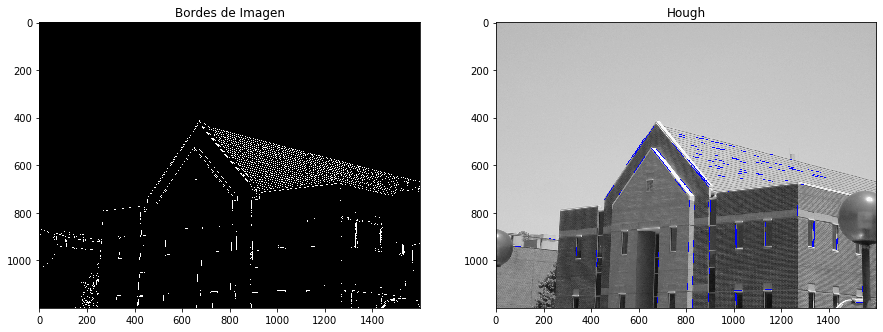

In [9]:
%matplotlib inline

def hough(imag,p1,p2):
    gray = cv2.cvtColor(imag,cv2.COLOR_BGR2GRAY)
    """Se buscan los bordes de la imagen para que con esto se puedan buscar las lineas que se quieren representar"""

    edges = cv2.Canny(gray,p1,p2)
    lines = cv2.HoughLinesP(edges,1,np.pi/180,80,10,20)
    for line in lines: # para opencv3
        for x1, y1, x2, y2 in line: # para opencv2 solo line[0]
            cv2.line(imag,(x1,y1),(x2,y2),(0,0,255),2)
    return imag, edges

img_names = ["building.jpg"]
for name in img_names:
    print (name)
    img = cv2.imread("files/"+name)
    if name=="sudoku.jpg":
        ho, ed=hough(img,25,200)
    else:
        ho, ed=hough(img,200,250)
    plt.figure(figsize=(15,15))

    """Bordes Canny"""
    plt.subplot(2,2,1)
    plt.title("Bordes de Imagen")
    plt.imshow(ed, cmap='gray')

    """Bordes Hough"""
    plt.subplot(2,2,2)
    plt.title("Hough")
    plt.imshow(ho)

    plt.show()

## Problem 7

Write a function that implements a simple adaptive thresholding algorithm as described below:

1. Select an initial estimate for $T$. A good initial value for $T$ would be equal to the average of the maximum and minimum intensity value of the image.
2. Threshold the image using $T$. This produces two groups: $G_1$, with pixels whose intensity is equal or less than $T$; and $G_2$, with pixels whose intensity is greater than $T$.
3. Compute the intensity averages $\mu_1$ and $\mu_2$ for the pixels in regions $G_1$ and $G_2$.
4. Compute a new threshold value
\begin{equation}
T=\frac{\mu_1 + \mu_2}{2}
\end{equation}

5. Repeat steps 2-4 until the difference in $T$ between successive iterations is less than a predefined parameter $T_0$.

Apply your function to the image <tt>fingerprint.jpg</tt>. Analyze your results.


In [10]:
def AdaptativeThresholding(image, T0):
    u1 = image[image > T0].mean()
    u2 = image[image <= T0].mean()
    T = (u1 + u2)/2
    if np.abs(T - T0) > 1e-6: # Error para iteración
        return AdaptativeThresholding(image, T)
    else:
        _, img_out = cv2.threshold(image, T, 255, cv2.THRESH_BINARY)
        return img_out, T

fingerprint.jpg


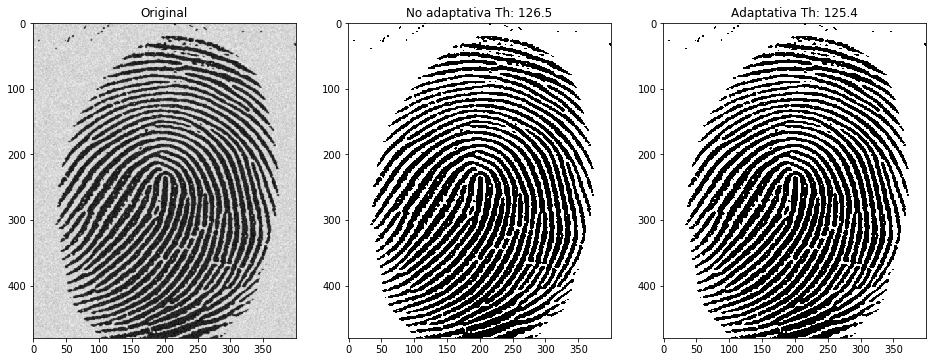

In [11]:
%matplotlib inline

def main7():
    img_names = ["fingerprint.jpg"]
    for name in img_names:
        
        # original
        print (name)
        img = cv2.imread("files/"+name, cv2.IMREAD_GRAYSCALE)
        plt.figure(figsize=(16,16));
        plt.subplot(1,3,1); 
        plt.imshow(img, cmap = 'gray');
        plt.title('Original');
        
        # no adaptative
        Ts = ( np.max(img) + np.min(img) )/2.0
        _, img3 = cv2.threshold(img, Ts, 255, cv2.THRESH_BINARY)
        plt.subplot(1,3,2); 
        plt.imshow(img3, cmap = 'gray');
        plt.title('No adaptativa Th: '+str(Ts));
        
        # adaptative
        img2,Te = AdaptativeThresholding(img, Ts)
        plt.subplot(1,3,3); 
        plt.imshow(img2, cmap = 'gray');
        plt.title('Adaptativa Th: '+str(np.round(Te,2)));
        
        plt.show()

main7()

## Problem 8

Write a function that uses the $k$-means algorithm to perform image segmentation using RGB pixel colors as features.
Write also a variant of this segmentation approach that uses the H and S components of each pixel represented in the HSI color space. Here, you should use normalized H and S values, so that both variables range between 0 and 1.
Apply your functions to the image <tt>mms.jpg</tt>. Select an appropriate value of $k$.


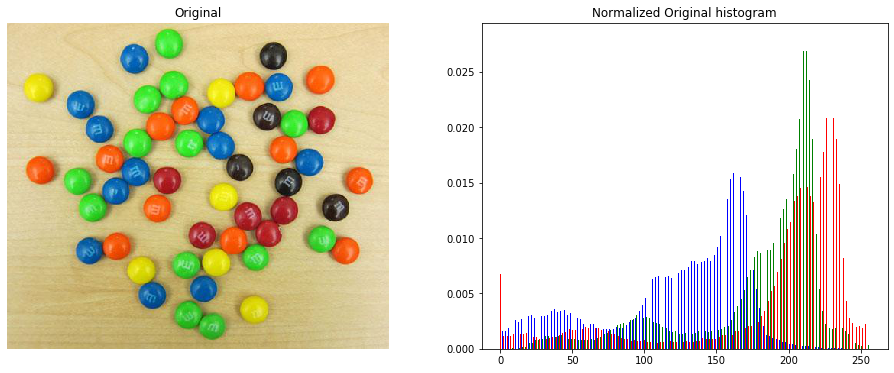

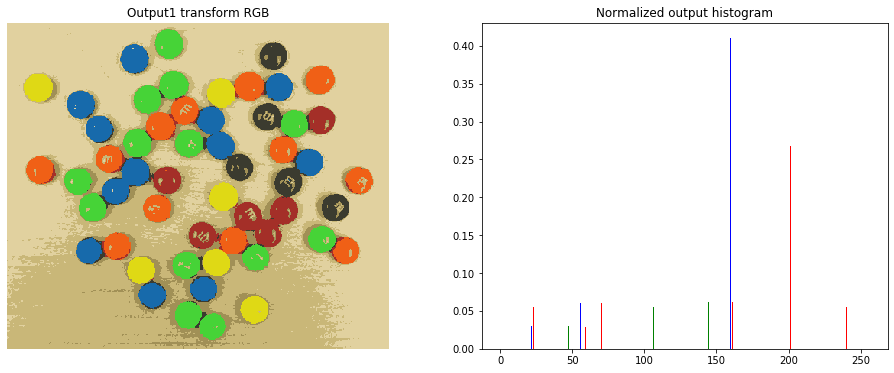

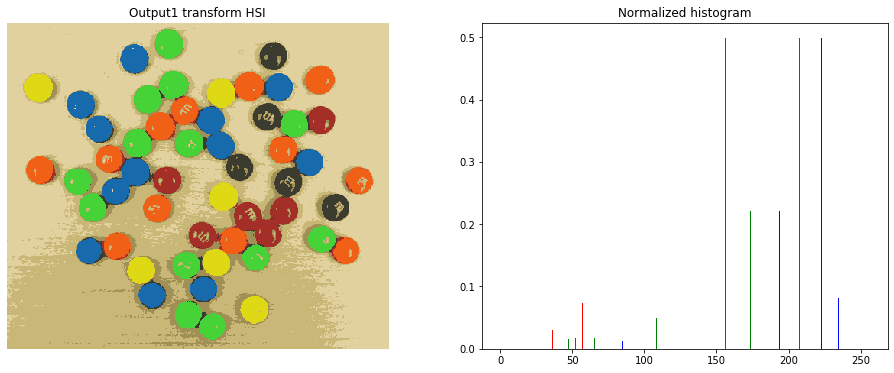

In [12]:
%matplotlib inline

def ztransform(img):
    # change matrix dimentions
    return np.reshape(img, (-1, 3))

def kmean(Z,K):    
    imageZ = np.float32(Z)
    # Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    # Set flags (Just to avoid line break in the code)
    flags = cv2.KMEANS_RANDOM_CENTERS
    # Apply KMeans
    compactness,labels,centers = cv2.kmeans(imageZ,K,None,criteria,10,flags)
    centers = np.uint8(centers)
    return centers[labels.flatten()]
    
def main8():
    #load image
    imageBGR = cv2.imread('files/mms.jpg')
    imageRGB = cv2.cvtColor(imageBGR, cv2.COLOR_BGR2RGB)
    
    #display original color 
    plt.figure(figsize=(16, 6))
    plt.subplot(1,2,1)
    plt.imshow(imageRGB)
    plt.title('Original')   
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.hist(imageRGB.reshape(-1, 3), 256, [0, 256], density=True, color = ['r','g','b'], lw=0)
    plt.title('Normalized Original histogram')
    
    # transform spapce RGB
    
    ztr_rgb = ztransform(imageRGB)
    
    img_out1 = kmean(ztr_rgb, 9)
    rgb_ori_shape = np.resize(img_out1, imageRGB.shape)
    
    #display output1 
    plt.figure(figsize=(16, 6))
    plt.subplot(1,2,1)
    plt.imshow(rgb_ori_shape)
    plt.title('Output1 transform RGB')   
    plt.axis('off')
    
    #display histogram color
    plt.subplot(1,2,2)
    plt.hist(rgb_ori_shape.reshape(-1, 3), 256, [0, 256], density=True, color = ['r','g','b'], lw=0)
    plt.title('Normalized output histogram')
    
    # transfor HSI
    
    imageHSV = cv2.cvtColor(imageBGR, cv2.COLOR_BGR2HSV)
    img_out2 = kmean(ztransform(imageHSV), 9)
    hsi_ori_shape = np.resize(img_out2, imageHSV.shape)
    
    img_out2_rgb = cv2.cvtColor(hsi_ori_shape, cv2.COLOR_HSV2BGR)
    
    #display histogram color 
    plt.figure(figsize=(16, 6))
    plt.subplot(1,2,1)
    plt.imshow(rgb_ori_shape)
    plt.title('Output1 transform HSI')   
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.hist(img_out2_rgb.reshape(-1 ,3), 256, [0, 256], density=True, color = ['r','g','b'], lw=0)
    plt.title('Normalized histogram')
    
    plt.show()
    
main8()